In [118]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('Yutube trending data/archive/USvideos.csv')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [3]:
with open('Yutube trending data/archive/US_category_id.json') as f:
    json_data = json.load(f)

In [4]:
items = json_data['items']
item_dicts = []
for item in items:
    item_dict = {
        'id': item['id'],
        'category_title': item['snippet']['title']
    }
    item_dicts.append(item_dict)

In [5]:
id_to_title_df = pd.DataFrame(item_dicts)
id_to_title_df['id'] = id_to_title_df['id'].astype('int64')

In [6]:
id_to_title_df

,id,category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [7]:
merged_df = pd.merge(df, id_to_title_df, left_on='category_id', right_on='id', how='left')
merged_df.drop(columns=['id'], inplace=True)
category_id_index = merged_df.columns.get_loc('category_id')
merged_df.insert(category_id_index + 1, 'category_title', merged_df.pop('category_title'))

In [8]:
merged_df

,video_id,trending_date,title,channel_title,category_id,category_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [9]:
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], format='%y.%d.%m').dt.strftime('%Y-%m-%dT%H:%M:%S.000Z')
merged_df

,video_id,trending_date,title,channel_title,category_id,category_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14T00:00:00.000Z,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14T00:00:00.000Z,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14T00:00:00.000Z,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14T00:00:00.000Z,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14T00:00:00.000Z,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14T00:00:00.000Z,The Cat Who Caught the Laser,AaronsAnimals,15,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,2018-06-14T00:00:00.000Z,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,2018-06-14T00:00:00.000Z,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,2018-06-14T00:00:00.000Z,How Black Panther Should Have Ended,How It Should Have Ended,1,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [10]:
count_unique = (merged_df.duplicated() == False).sum()
count_duplicates = (merged_df.duplicated() == True).sum()

print("Number of unique rows:", count_unique)
print("Number of duplicate rows:", count_duplicates)

Number of unique rows: 40901
Number of duplicate rows: 48


In [11]:
df_unique = merged_df.drop_duplicates()

In [12]:
df_unique

,video_id,trending_date,title,channel_title,category_id,category_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14T00:00:00.000Z,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14T00:00:00.000Z,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14T00:00:00.000Z,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14T00:00:00.000Z,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14T00:00:00.000Z,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14T00:00:00.000Z,The Cat Who Caught the Laser,AaronsAnimals,15,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,2018-06-14T00:00:00.000Z,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,2018-06-14T00:00:00.000Z,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,2018-06-14T00:00:00.000Z,How Black Panther Should Have Ended,How It Should Have Ended,1,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [13]:
df_sorted = df_unique.sort_values(by=['video_id', 'title', 'channel_title', 'publish_time', 'trending_date'], ascending=[True, True, True, True, False])

In [14]:
df_sorted

,video_id,trending_date,title,channel_title,category_id,category_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
32214,#NAME?,2018-05-02T00:00:00.000Z,'Avengers: Infinity War' Cast Tours Los Angele...,The Late Late Show with James Corden,22,People & Blogs,2018-04-27T05:37:41.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",4518449,179304,2030,5875,https://i.ytimg.com/vi/-lgcAySBbTA/default.jpg,False,False,False,The stakes are high for James Corden's newest ...
31991,#NAME?,2018-05-01T00:00:00.000Z,'Avengers: Infinity War' Cast Tours Los Angele...,The Late Late Show with James Corden,22,People & Blogs,2018-04-27T05:37:41.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",3896764,155621,1880,5468,https://i.ytimg.com/vi/-lgcAySBbTA/default.jpg,False,False,False,The stakes are high for James Corden's newest ...
31770,#NAME?,2018-04-30T00:00:00.000Z,'Avengers: Infinity War' Cast Tours Los Angele...,The Late Late Show with James Corden,22,People & Blogs,2018-04-27T05:37:41.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",3376181,135961,1738,4827,https://i.ytimg.com/vi/-lgcAySBbTA/default.jpg,False,False,False,The stakes are high for James Corden's newest ...
31551,#NAME?,2018-04-29T00:00:00.000Z,'Avengers: Infinity War' Cast Tours Los Angele...,The Late Late Show with James Corden,22,People & Blogs,2018-04-27T05:37:41.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",2511515,102300,1405,3898,https://i.ytimg.com/vi/-lgcAySBbTA/default.jpg,False,False,False,The stakes are high for James Corden's newest ...
31351,#NAME?,2018-04-28T00:00:00.000Z,'Avengers: Infinity War' Cast Tours Los Angele...,The Late Late Show with James Corden,22,People & Blogs,2018-04-27T05:37:41.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",1331385,61269,446,2354,https://i.ytimg.com/vi/-lgcAySBbTA/default.jpg,False,False,False,The stakes are high for James Corden's newest ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32352,zxwfDlhJIpw,2018-05-03T00:00:00.000Z,kanye west / charlamagne interview,Kanye West,22,People & Blogs,2018-05-01T15:57:06.000Z,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",5434079,131430,14405,39155,https://i.ytimg.com/vi/zxwfDlhJIpw/default.jpg,False,False,False,NaN
32150,zxwfDlhJIpw,2018-05-02T00:00:00.000Z,kanye west / charlamagne interview,Kanye West,22,People & Blogs,2018-05-01T15:57:06.000Z,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",3134765,88905,7526,26692,https://i.ytimg.com/vi/zxwfDlhJIpw/default.jpg,False,False,False,NaN
144,zy0b9e40tK8,2017-11-14T00:00:00.000Z,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09T09:00:07.000Z,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...
16559,zzQsGL_F9_c,2018-02-06T00:00:00.000Z,Budweiser | Beer Country | :60,Budweiser,24,Entertainment,2018-01-30T18:30:04.000Z,"Budweiser|""Super Bowl""|""Clydesdales""|""Bud""|""Th...",199041,1415,121,62,https://i.ytimg.com/vi/zzQsGL_F9_c/default.jpg,False,False,False,This is a story bigger than beer. It’s a story...


## Trending days

In [15]:
trending_days = df_sorted.groupby(['video_id', 'title', 'channel_title', 'category_id', 'publish_time'])['trending_date'].count()
trending_days_df = trending_days.reset_index(name='trending_days')
trending_days_df = trending_days_df.sort_values(by='trending_days', ascending=False)

In [16]:
trending_days_df

,video_id,title,channel_title,category_id,publish_time,trending_days
986,8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,29
4772,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,29
2799,QBL8IRJ5yHU,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,28
3572,YI3tsmFsrOg,The Deadliest Being on Planet Earth – The Bact...,Kurzgesagt – In a Nutshell,27,2018-05-13T12:00:22.000Z,28
5854,t4pRQ0jn23Q,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,28
...,...,...,...,...,...,...
2845,QeFwtA3p4Mw,"Kendrick Lamar, U2, Dave Chappelle - Performan...",KendrickLamarVEVO,10,2018-02-04T01:11:29.000Z,1
2830,QSFmuI-DAK4,Shaquem Griffin reacts to being drafted by the...,ESPN,17,2018-04-28T18:49:38.000Z,1
2829,QS8bma7LRX4,Natalie's 2nd Rap - SNL,Saturday Night Live,24,2018-02-04T05:57:36.000Z,1
2821,QO9SS1NS6MM,Inside the Quest to Make Lab Grown Meat | WIRED,WIRED,28,2018-02-16T17:01:03.000Z,1


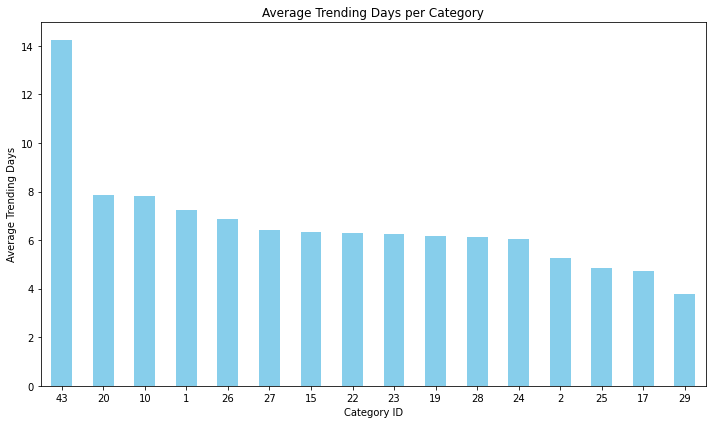

In [17]:
average_trending_days_per_category = trending_days_df.groupby('category_id')['trending_days'].mean()
average_trending_days_sorted = average_trending_days_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_trending_days_sorted.plot(kind='bar', color='skyblue')  # Example with a specific color
plt.title('Average Trending Days per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Trending Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
average_trending_days_df = average_trending_days_sorted.reset_index()
average_trending_days_df.columns = ['Category ID', 'Average Trending Days']
average_trending_days_df

,Category ID,Average Trending Days
0,43,14.250000
1,20,7.846154
2,10,7.819831
3,1,7.231481
4,26,6.880399
5,27,6.414729
6,15,6.344828
7,22,6.302554
8,23,6.244123
9,19,6.169231


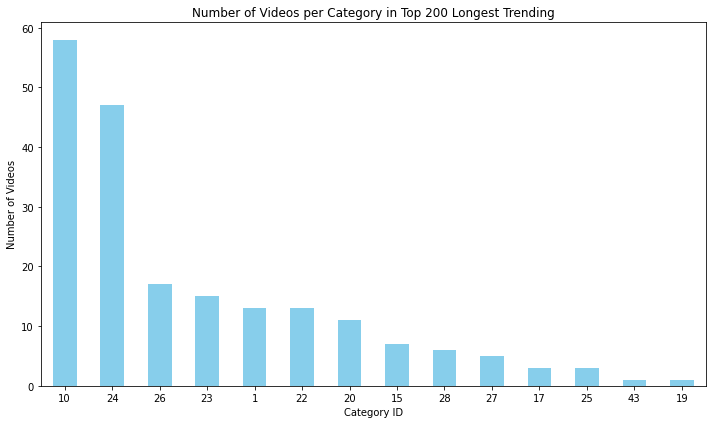

In [19]:
top_200_longest_trending_videos = trending_days_df.head(200)
category_counts_in_top_200_trending_duration = top_200_longest_trending_videos['category_id'].value_counts()

plt.figure(figsize=(10, 6))
category_counts_in_top_200_trending_duration.plot(kind='bar', color='skyblue')
plt.title('Number of Videos per Category in Top 200 Longest Trending')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
category_counts_in_top_200_trending_duration_df = category_counts_in_top_200_trending_duration.reset_index()
category_counts_in_top_200_trending_duration_df.columns = ['Category ID', 'Number of Videos']
category_counts_in_top_200_trending_duration_df

,Category ID,Number of Videos
0,10,58
1,24,47
2,26,17
3,23,15
4,1,13
5,22,13
6,20,11
7,15,7
8,28,6
9,27,5


### Obtain a dataset with unique videos and their final day trending data

In [21]:
df_unique_v2 = df_sorted.drop_duplicates(subset=['video_id', 'title', 'channel_title', 'category_id' , 'publish_time'], keep='first')

In [22]:
df_unique_v2

,video_id,trending_date,title,channel_title,category_id,category_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
32214,#NAME?,2018-05-02T00:00:00.000Z,'Avengers: Infinity War' Cast Tours Los Angele...,The Late Late Show with James Corden,22,People & Blogs,2018-04-27T05:37:41.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",4518449,179304,2030,5875,https://i.ytimg.com/vi/-lgcAySBbTA/default.jpg,False,False,False,The stakes are high for James Corden's newest ...
21093,#NAME?,2018-03-01T00:00:00.000Z,*SPOILER* 5th Eliminated Queen RuPaul's All St...,WOWPresents,24,Entertainment,2018-02-23T13:00:00.000Z,"world of wonder|""world of wonder productions""|...",249572,7944,301,1431,https://i.ytimg.com/vi/-nbm90xAhWY/default.jpg,False,False,False,Enjoy the video? Subscribe here: http://bit.ly...
1588,#NAME?,2017-11-21T00:00:00.000Z,24 Facts about Koalas - mental_floss List Show...,Mental Floss,27,Education,2017-11-15T16:00:00.000Z,"john green|""mental floss""|""koalas""|""marsupial""...",38775,1373,16,140,https://i.ytimg.com/vi/-oXybog2IuI/default.jpg,False,False,False,A weekly show where knowledge junkies get thei...
34563,#NAME?,2018-05-14T00:00:00.000Z,5 Times Scientists Were Very Wrong About New D...,SciShow,27,Education,2018-05-06T21:00:00.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",294810,8305,211,886,https://i.ytimg.com/vi/-pCzLbCCppo/default.jpg,False,False,False,Passionate scientists constantly have revoluti...
4599,#NAME?,2017-12-06T00:00:00.000Z,A social worker has the worst day of his life....,Omeleto,1,Film & Animation,2017-11-29T08:57:21.000Z,"ironied|""omeleto shorts""|""omeleto""|""homeless m...",83301,2636,65,167,https://i.ytimg.com/vi/-v-_Z11T5L4/default.jpg,False,False,False,He learns a life lesson at 5:17...\n� SUBSCRIB...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28342,zwEn-ambXLw,2018-04-06T00:00:00.000Z,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,10,Music,2018-03-22T08:30:07.000Z,"travis wall|""shoshana bean""|""greatest showman""...",241668,8478,144,328,https://i.ytimg.com/vi/zwEn-ambXLw/default.jpg,False,False,False,I was lucky enough to lay the original demo fo...
1183,zxUwbflE1SY,2017-11-19T00:00:00.000Z,100 People Hold Their Breath for as Long as Th...,Cut,24,Entertainment,2017-11-13T13:00:10.000Z,"breath|""hold""|""funny""|""holding breath""|""breath...",225280,5770,150,1312,https://i.ytimg.com/vi/zxUwbflE1SY/default.jpg,False,False,False,Get Cut swag here: http://cut.com/shop\n\nDon’...
36944,zxwfDlhJIpw,2018-05-25T00:00:00.000Z,kanye west / charlamagne interview,Kanye West,22,People & Blogs,2018-05-01T15:57:06.000Z,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8442986,166520,19462,48467,https://i.ytimg.com/vi/zxwfDlhJIpw/default.jpg,False,False,False,NaN
144,zy0b9e40tK8,2017-11-14T00:00:00.000Z,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09T09:00:07.000Z,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...


In [23]:
df_unique_v2.loc[:, 'like_to_view_ratio'] = round((df_unique_v2['likes'] / df_unique_v2['views'])*100, 2)
df_unique_v2.loc[:, 'dislike_to_view_ratio'] = round((df_unique_v2['dislikes'] / df_unique_v2['views'])*100, 2)
df_unique_v2.loc[:, 'comment_to_view_ratio'] = round((df_unique_v2['comment_count'] / df_unique_v2['views'])*100, 2)

C:\Users\shuyu\AppData\Local\Temp\ipykernel_10808\1147542510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_v2.loc[:, 'like_to_view_ratio'] = round((df_unique_v2['likes'] / df_unique_v2['views'])*100, 2)
C:\Users\shuyu\AppData\Local\Temp\ipykernel_10808\1147542510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_v2.loc[:, 'dislike_to_view_ratio'] = round((df_unique_v2['dislikes'] / df_unique_v2['views'])*100, 2)
C:\Users\shuyu\AppData\Local\Temp\ipykernel_10808\1147542510.py:3: S

In [24]:
df_unique_v2

,video_id,trending_date,title,channel_title,category_id,category_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_to_view_ratio,dislike_to_view_ratio,comment_to_view_ratio
32214,#NAME?,2018-05-02T00:00:00.000Z,'Avengers: Infinity War' Cast Tours Los Angele...,The Late Late Show with James Corden,22,People & Blogs,2018-04-27T05:37:41.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",4518449,179304,2030,5875,https://i.ytimg.com/vi/-lgcAySBbTA/default.jpg,False,False,False,The stakes are high for James Corden's newest ...,3.97,0.04,0.13
21093,#NAME?,2018-03-01T00:00:00.000Z,*SPOILER* 5th Eliminated Queen RuPaul's All St...,WOWPresents,24,Entertainment,2018-02-23T13:00:00.000Z,"world of wonder|""world of wonder productions""|...",249572,7944,301,1431,https://i.ytimg.com/vi/-nbm90xAhWY/default.jpg,False,False,False,Enjoy the video? Subscribe here: http://bit.ly...,3.18,0.12,0.57
1588,#NAME?,2017-11-21T00:00:00.000Z,24 Facts about Koalas - mental_floss List Show...,Mental Floss,27,Education,2017-11-15T16:00:00.000Z,"john green|""mental floss""|""koalas""|""marsupial""...",38775,1373,16,140,https://i.ytimg.com/vi/-oXybog2IuI/default.jpg,False,False,False,A weekly show where knowledge junkies get thei...,3.54,0.04,0.36
34563,#NAME?,2018-05-14T00:00:00.000Z,5 Times Scientists Were Very Wrong About New D...,SciShow,27,Education,2018-05-06T21:00:00.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",294810,8305,211,886,https://i.ytimg.com/vi/-pCzLbCCppo/default.jpg,False,False,False,Passionate scientists constantly have revoluti...,2.82,0.07,0.30
4599,#NAME?,2017-12-06T00:00:00.000Z,A social worker has the worst day of his life....,Omeleto,1,Film & Animation,2017-11-29T08:57:21.000Z,"ironied|""omeleto shorts""|""omeleto""|""homeless m...",83301,2636,65,167,https://i.ytimg.com/vi/-v-_Z11T5L4/default.jpg,False,False,False,He learns a life lesson at 5:17...\n� SUBSCRIB...,3.16,0.08,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28342,zwEn-ambXLw,2018-04-06T00:00:00.000Z,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,10,Music,2018-03-22T08:30:07.000Z,"travis wall|""shoshana bean""|""greatest showman""...",241668,8478,144,328,https://i.ytimg.com/vi/zwEn-ambXLw/default.jpg,False,False,False,I was lucky enough to lay the original demo fo...,3.51,0.06,0.14
1183,zxUwbflE1SY,2017-11-19T00:00:00.000Z,100 People Hold Their Breath for as Long as Th...,Cut,24,Entertainment,2017-11-13T13:00:10.000Z,"breath|""hold""|""funny""|""holding breath""|""breath...",225280,5770,150,1312,https://i.ytimg.com/vi/zxUwbflE1SY/default.jpg,False,False,False,Get Cut swag here: http://cut.com/shop\n\nDon’...,2.56,0.07,0.58
36944,zxwfDlhJIpw,2018-05-25T00:00:00.000Z,kanye west / charlamagne interview,Kanye West,22,People & Blogs,2018-05-01T15:57:06.000Z,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8442986,166520,19462,48467,https://i.ytimg.com/vi/zxwfDlhJIpw/default.jpg,False,False,False,NaN,1.97,0.23,0.57
144,zy0b9e40tK8,2017-11-14T00:00:00.000Z,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09T09:00:07.000Z,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,1.49,0.04,0.18


## Category Count

In [25]:
category_counts_v2 = df_unique_v2.groupby('category_id')['video_id'].count()

In [26]:
if callable(category_counts_v2):
    category_counts_v2 = category_counts_v2()

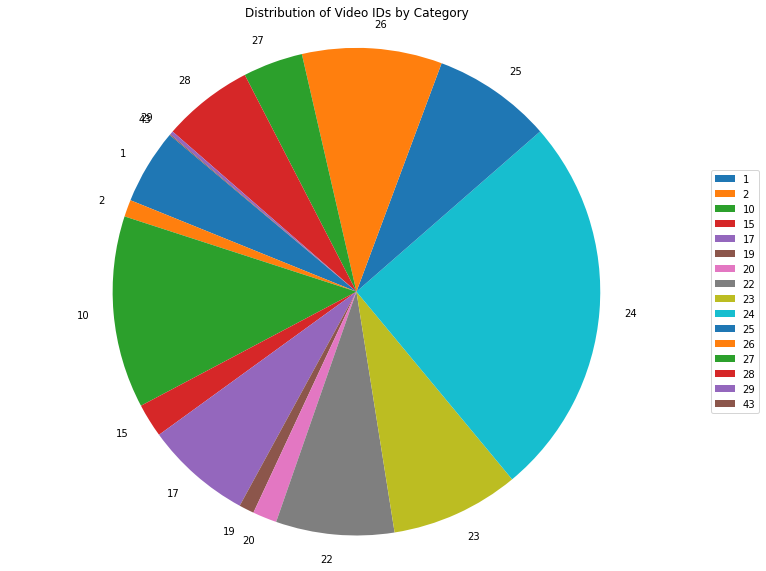

In [27]:
plt.figure(figsize=(10, 8)) 
plt.pie(category_counts_v2, labels=category_counts_v2.index, startangle=140)
plt.title('Distribution of Video IDs by Category')
plt.legend(category_counts_v2.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.axis('equal')
plt.show()

In [28]:
category_counts_df = pd.merge(category_counts_v2.reset_index(name='count'), id_to_title_df, left_on='category_id', right_on='id', how='left')
category_counts_df.drop(columns=['id'], inplace=True)
category_counts_df['percentage'] = round((category_counts_df['count'] / category_counts_df['count'].sum()) * 100, 2)
category_counts_df = category_counts_df.sort_values(by='count', ascending=False)
category_counts_df.reset_index(drop=True, inplace=True)

In [29]:
category_counts_df

,category_id,count,category_title,percentage
0,24,1648,Entertainment,25.39
1,10,827,Music,12.74
2,26,602,Howto & Style,9.28
3,23,553,Comedy,8.52
4,25,513,News & Politics,7.90
5,22,509,People & Blogs,7.84
6,17,459,Sports,7.07
7,28,391,Science & Technology,6.02
8,1,324,Film & Animation,4.99
9,27,258,Education,3.98


## Views

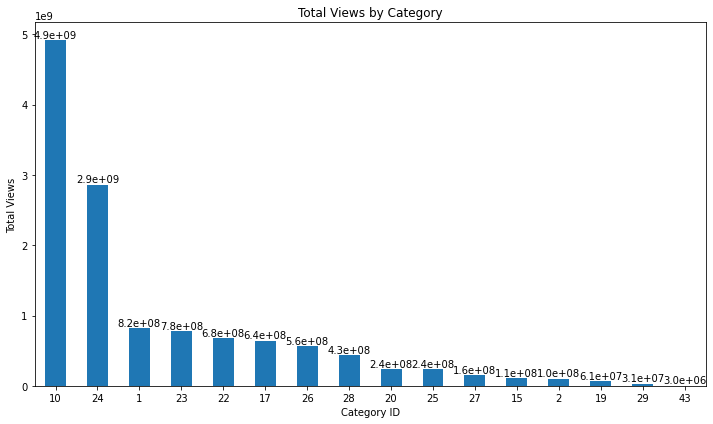

In [30]:
category_views = df_unique_v2.groupby('category_id')['views'].sum()
category_views = category_views.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = category_views.plot(kind='bar')  
plt.title('Total Views by Category')
plt.xlabel('Category ID')
plt.ylabel('Total Views')
plt.xticks(rotation=0) 
plt.tight_layout()  

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

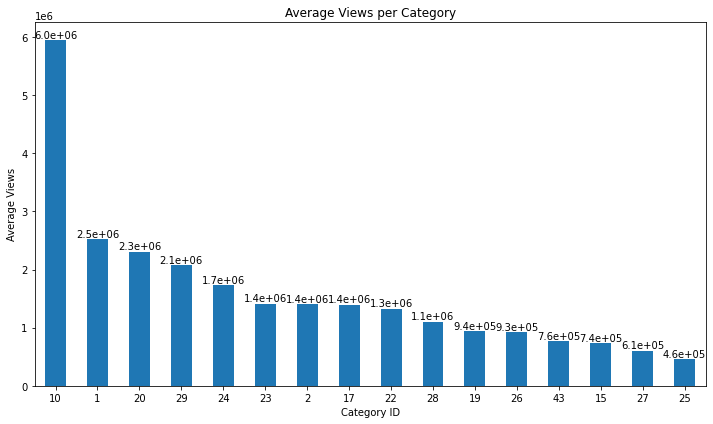

In [31]:
average_views_per_category = df_unique_v2.groupby('category_id')['views'].mean()
average_views_sorted = average_views_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = average_views_sorted.plot(kind='bar')
plt.title('Average Views per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Views')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

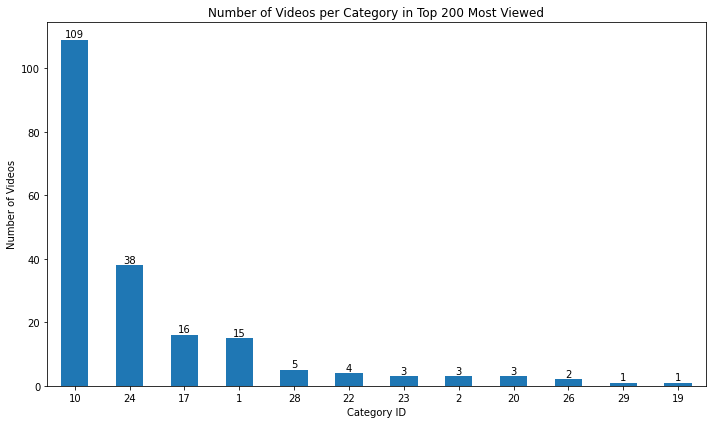

In [32]:
df_sorted_by_views = df_unique_v2.sort_values(by='views', ascending=False)
top_200_videos = df_sorted_by_views.head(200)
category_counts_in_top_200 = top_200_videos['category_id'].value_counts()

plt.figure(figsize=(10, 6))
bars = category_counts_in_top_200.plot(kind='bar')
plt.title('Number of Videos per Category in Top 200 Most Viewed')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height()}', 
             ha='center', va='bottom')
plt.show()

## Likes

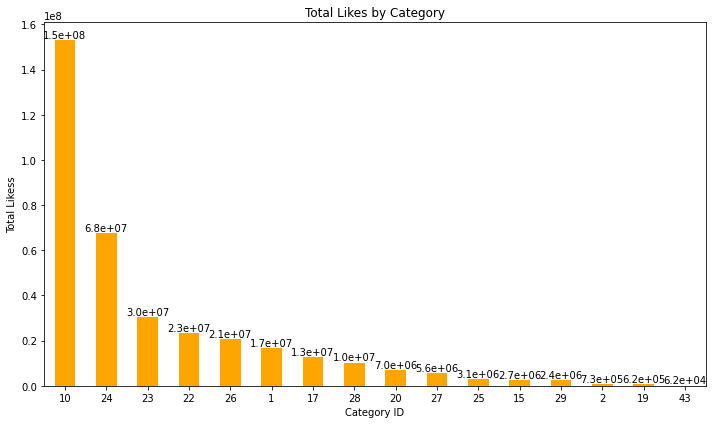

In [33]:
category_likes = df_unique_v2.groupby('category_id')['likes'].sum()
category_likes = category_likes.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = category_likes.plot(kind='bar', color='orange')  
plt.title('Total Likes by Category')
plt.xlabel('Category ID')
plt.ylabel('Total Likess')
plt.xticks(rotation=0) 
plt.tight_layout()  

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

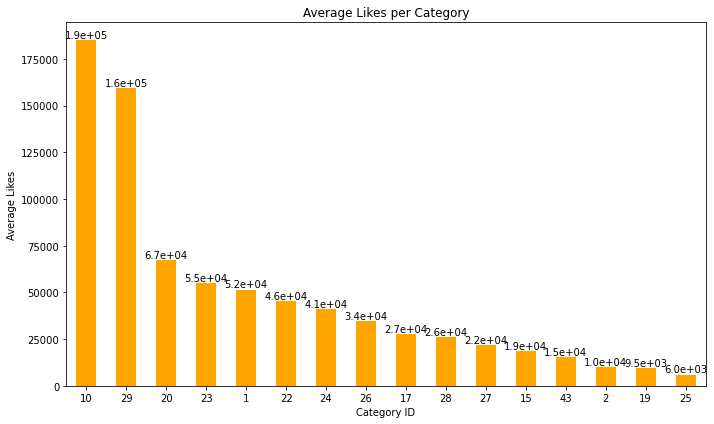

In [34]:
average_likes_per_category = df_unique_v2.groupby('category_id')['likes'].mean()
average_likes_sorted = average_likes_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = average_likes_sorted.plot(kind='bar', color='orange')
plt.title('Average Likes per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Likes')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

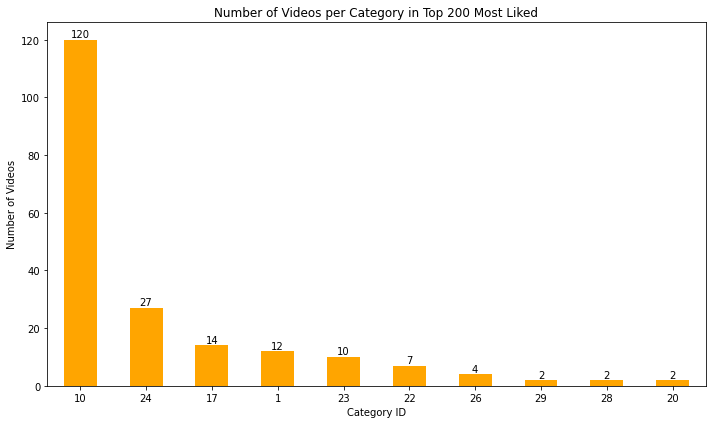

In [35]:
df_sorted_by_likes = df_unique_v2.sort_values(by='likes', ascending=False)
top_200_videos = df_sorted_by_likes.head(200)
category_counts_in_top_200 = top_200_videos['category_id'].value_counts()

plt.figure(figsize=(10, 6))
bars = category_counts_in_top_200.plot(kind='bar', color='orange')
plt.title('Number of Videos per Category in Top 200 Most Liked')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height()}', 
             ha='center', va='bottom')
plt.show()

## Like View Ratio

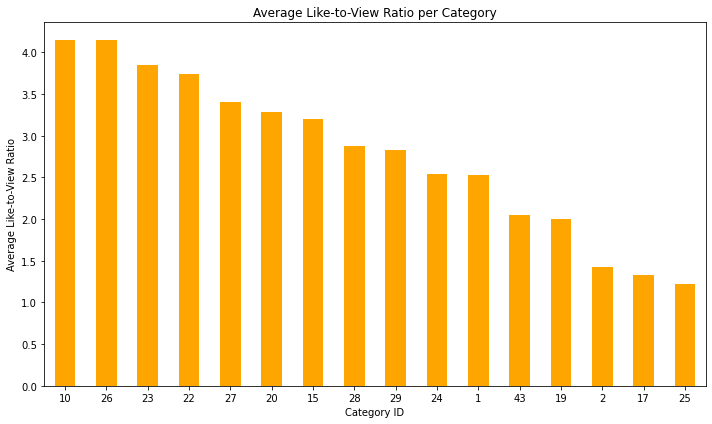

In [36]:
average_like_to_view_ratio_per_category = df_unique_v2.groupby('category_id')['like_to_view_ratio'].mean()
average_like_to_view_ratio_sorted = average_like_to_view_ratio_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = average_like_to_view_ratio_sorted.plot(kind='bar', color='orange')
plt.title('Average Like-to-View Ratio per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Like-to-View Ratio')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

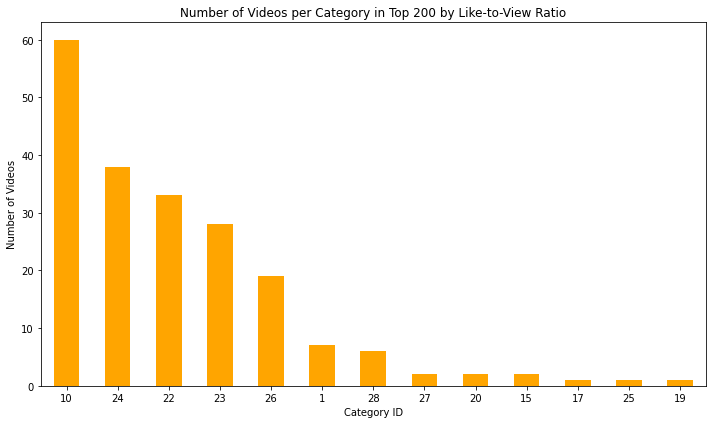

In [37]:
df_sorted_by_ratio = df_unique_v2.sort_values(by='like_to_view_ratio', ascending=False)
top_200_by_ratio = df_sorted_by_ratio.head(200)
category_counts_in_top_200_ratio = top_200_by_ratio['category_id'].value_counts()

plt.figure(figsize=(10, 6))
category_counts_in_top_200_ratio.plot(kind='bar', color='orange')
plt.title('Number of Videos per Category in Top 200 by Like-to-View Ratio')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## Dislikes

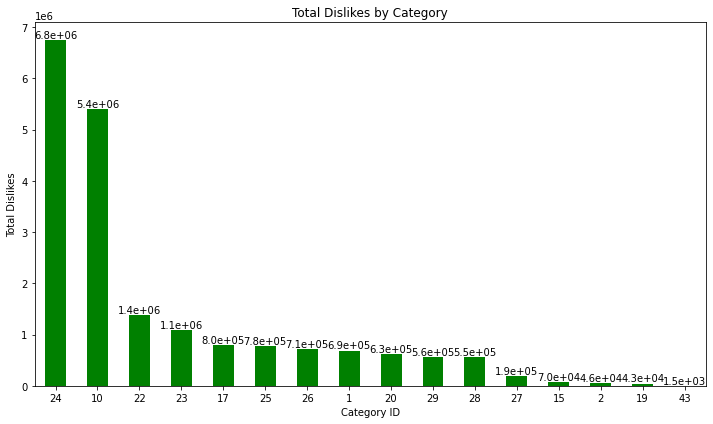

In [38]:
category_dislikes = df_unique_v2.groupby('category_id')['dislikes'].sum()
category_dislikes = category_dislikes.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = category_dislikes.plot(kind='bar', color='green')  
plt.title('Total Dislikes by Category')
plt.xlabel('Category ID')
plt.ylabel('Total Dislikes')
plt.xticks(rotation=0) 
plt.tight_layout()  

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

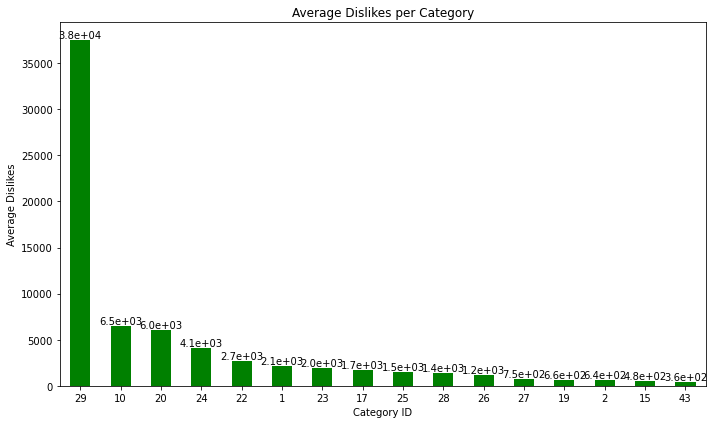

In [39]:
average_dislikes_per_category = df_unique_v2.groupby('category_id')['dislikes'].mean()
average_dislikes_sorted = average_dislikes_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = average_dislikes_sorted.plot(kind='bar', color='green')
plt.title('Average Dislikes per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Dislikes')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

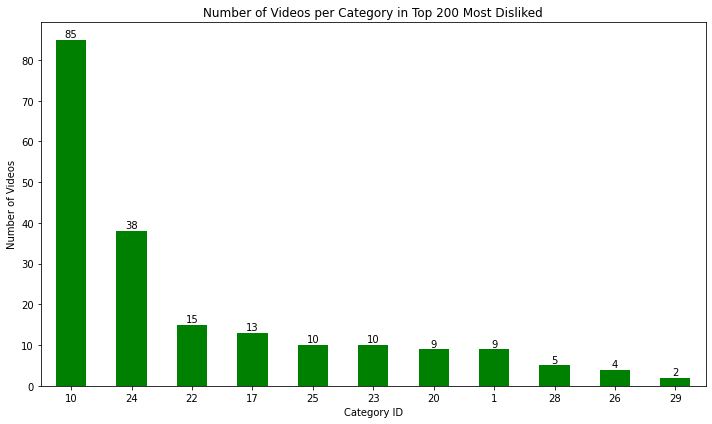

In [40]:
df_sorted_by_dislikes = df_unique_v2.sort_values(by='dislikes', ascending=False)
top_200_videos = df_sorted_by_dislikes.head(200)
category_counts_in_top_200 = top_200_videos['category_id'].value_counts()

plt.figure(figsize=(10, 6))
bars = category_counts_in_top_200.plot(kind='bar', color='green')
plt.title('Number of Videos per Category in Top 200 Most Disliked')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height()}', 
             ha='center', va='bottom')
plt.show()

## Dislike View Ratio

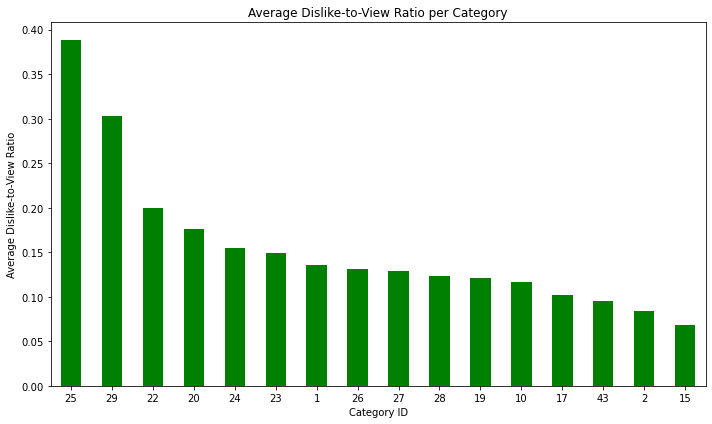

In [41]:
average_dislike_to_view_ratio_per_category = df_unique_v2.groupby('category_id')['dislike_to_view_ratio'].mean()
average_dislike_to_view_ratio_sorted = average_dislike_to_view_ratio_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = average_dislike_to_view_ratio_sorted.plot(kind='bar', color='green')
plt.title('Average Dislike-to-View Ratio per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Dislike-to-View Ratio')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

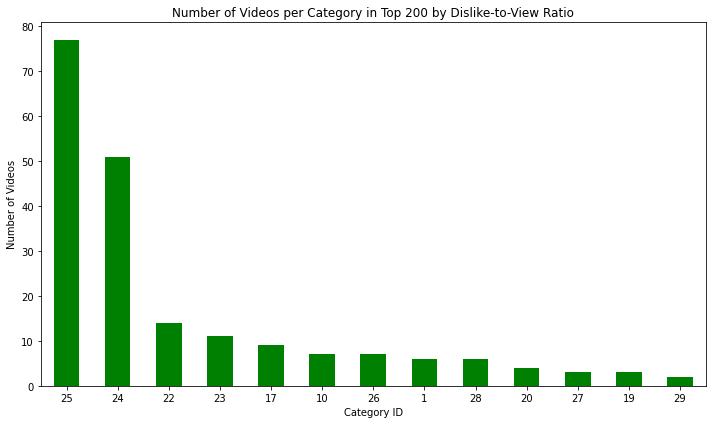

In [42]:
df_sorted_by_ratio = df_unique_v2.sort_values(by='dislike_to_view_ratio', ascending=False)
top_200_by_ratio = df_sorted_by_ratio.head(200)
category_counts_in_top_200_ratio = top_200_by_ratio['category_id'].value_counts()

plt.figure(figsize=(10, 6))
category_counts_in_top_200_ratio.plot(kind='bar', color='green')
plt.title('Number of Videos per Category in Top 200 by Dislike-to-View Ratio')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## Comments

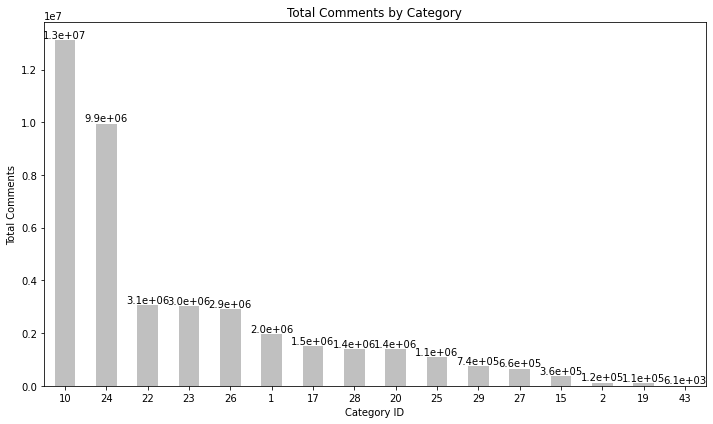

In [43]:
category_comments = df_unique_v2.groupby('category_id')['comment_count'].sum()
category_comments = category_comments.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = category_comments.plot(kind='bar', color='silver')  
plt.title('Total Comments by Category')
plt.xlabel('Category ID')
plt.ylabel('Total Comments')
plt.xticks(rotation=0) 
plt.tight_layout()  

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

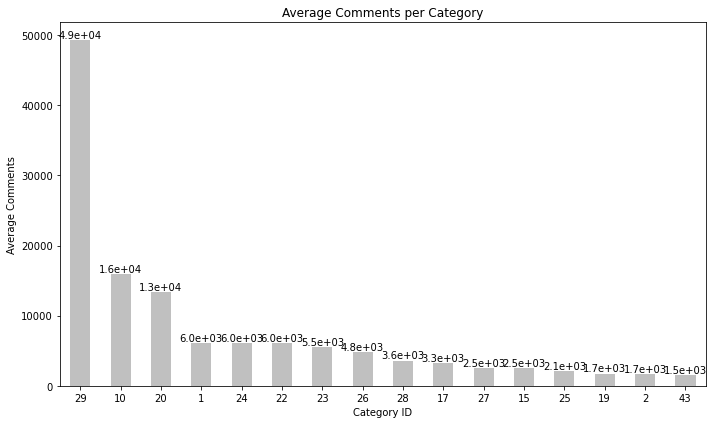

In [44]:
average_comments_per_category = df_unique_v2.groupby('category_id')['comment_count'].mean()
average_comments_sorted = average_comments_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = average_comments_sorted.plot(kind='bar', color='silver')
plt.title('Average Comments per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Comments')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    label = '{:.1e}'.format(bar.get_height())  # Convert number to scientific notation
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, label, 
             ha='center', va='bottom')
plt.show()

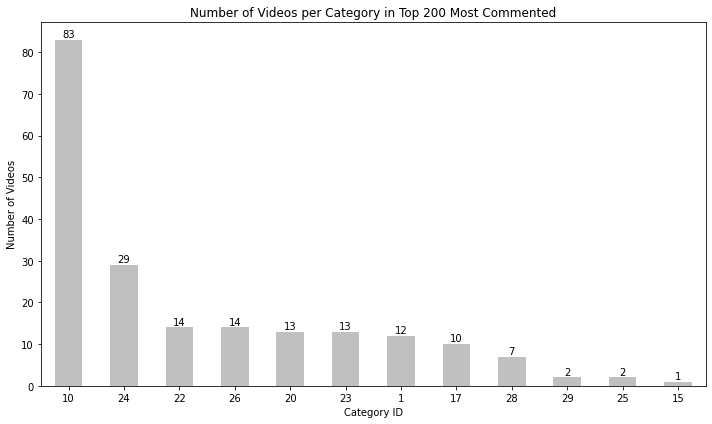

In [45]:
df_sorted_by_comments = df_unique_v2.sort_values(by='comment_count', ascending=False)
top_200_videos = df_sorted_by_comments.head(200)
category_counts_in_top_200 = top_200_videos['category_id'].value_counts()

plt.figure(figsize=(10, 6))
bars = category_counts_in_top_200.plot(kind='bar', color='silver')
plt.title('Number of Videos per Category in Top 200 Most Commented')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height()}', 
             ha='center', va='bottom')
plt.show()

## Comment View Ratio

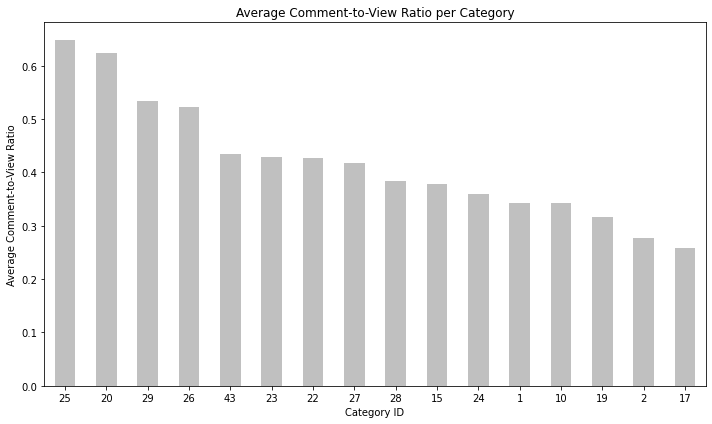

In [46]:
average_comment_to_view_ratio_per_category = df_unique_v2.groupby('category_id')['comment_to_view_ratio'].mean()
average_comment_to_view_ratio_sorted = average_comment_to_view_ratio_per_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = average_comment_to_view_ratio_sorted.plot(kind='bar', color='silver')
plt.title('Average Comment-to-View Ratio per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Comment-to-View Ratio')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

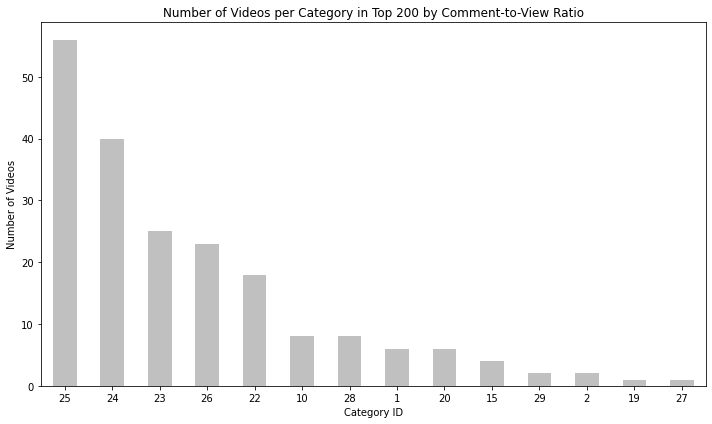

In [47]:
df_sorted_by_ratio = df_unique_v2.sort_values(by='comment_to_view_ratio', ascending=False)
top_200_by_ratio = df_sorted_by_ratio.head(200)
category_counts_in_top_200_ratio = top_200_by_ratio['category_id'].value_counts()

plt.figure(figsize=(10, 6))
category_counts_in_top_200_ratio.plot(kind='bar', color='silver')
plt.title('Number of Videos per Category in Top 200 by Comment-to-View Ratio')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

#### Possible Next Step:


1. dont drop duplicate of same video trending for multiple days, analyze statistic data of that, for exmaple, look at how many views/like/dislikes/comments growth are there when the video is trending. Is this growth correlated to how long the video stays trending?

2. perform analysis not based on categories but on channel, to find popular worth-investing channels instead of categories

3. text analysis? making use of tags and descriptions data column instead of purely numerical analysis

4. trend analysis and time series analysis

5. personally felt like the graphs look not very pleasent, tableau?

## trending duration and statistic growth

In [48]:
df_num = df_sorted
df_num['publish_time'] = pd.to_datetime(df_num['publish_time'])
df_num['trending_date'] = pd.to_datetime(df_num['trending_date'])
df_num['views'] = pd.to_numeric(df_num['views'], errors='coerce')
df_num['likes'] = pd.to_numeric(df_num['likes'], errors='coerce')
df_num['dislikes'] = pd.to_numeric(df_num['dislikes'], errors='coerce')
df_num['comment_count'] = pd.to_numeric(df_num['comment_count'], errors='coerce')

In [61]:
last_day_metrics = df_num.groupby(['video_id', 'title', 'channel_title', 'category_id', 'publish_time']).first().reset_index()
first_day_metrics = df_num.groupby(['video_id', 'title', 'channel_title', 'category_id', 'publish_time']).last().reset_index()

In [74]:
growth_data = pd.DataFrame()
growth_data['video_id'] = last_day_metrics['video_id']
growth_data['views_growth'] = last_day_metrics['views'] - first_day_metrics['views']
growth_data['likes_growth'] = last_day_metrics['likes'] - first_day_metrics['likes']
growth_data['dislikes_growth'] = last_day_metrics['dislikes'] - first_day_metrics['dislikes']
growth_data['comments_growth'] = last_day_metrics['comment_count'] - first_day_metrics['comment_count']

trending_duration = pd.DataFrame()
trending_duration['video_id'] = last_day_metrics['video_id']
trending_duration['trending_duration'] = (last_day_metrics['trending_date'] - first_day_metrics['trending_date']).dt.days + 1

In [77]:
analysis_df = pd.merge(growth_data, trending_duration, on='video_id')

In [78]:
analysis_df

,video_id,views_growth,likes_growth,dislikes_growth,comments_growth,trending_duration
0,#NAME?,3187064,118035,1584,3521,5
1,#NAME?,3187064,118035,1584,3521,6
2,#NAME?,3187064,118035,1584,3521,6
3,#NAME?,3187064,118035,1584,3521,7
4,#NAME?,3187064,118035,1584,3521,7
...,...,...,...,...,...,...
11889,zwEn-ambXLw,127535,3499,78,130,12
11890,zxUwbflE1SY,34611,608,19,161,5
11891,zxwfDlhJIpw,5308221,77615,11936,21775,24
11892,zy0b9e40tK8,0,0,0,0,1


In [87]:
correlations = analysis_df[['views_growth', 'likes_growth', 'dislikes_growth', 'comments_growth', 'trending_duration']].corr()['trending_duration'][:-1]

views_growth       0.166003
likes_growth       0.172156
dislikes_growth    0.053057
comments_growth    0.101936
Name: trending_duration, dtype: float64

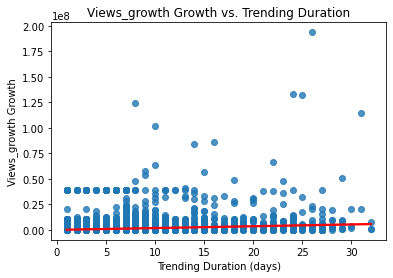

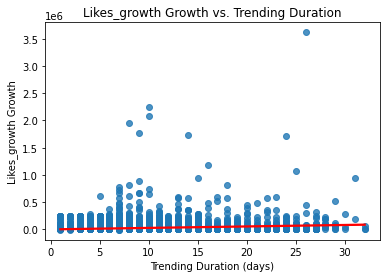

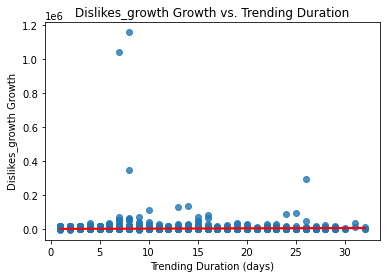

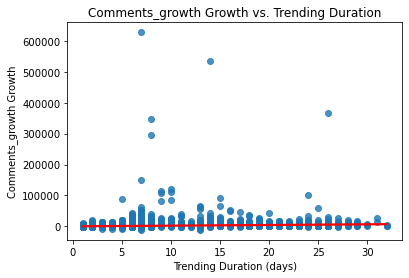

In [89]:
def plot_regression_vs_duration(metric_name):
    sns.regplot(data=analysis_df, x='trending_duration', y=metric_name, ci=95, line_kws={'color': 'red'})
    plt.title(f'{metric_name.capitalize()} Growth vs. Trending Duration')
    plt.xlabel('Trending Duration (days)')
    plt.ylabel(f'{metric_name.capitalize()} Growth')
    plt.show()

for metric in ['views_growth', 'likes_growth', 'dislikes_growth', 'comments_growth']:
    plot_regression_vs_duration(metric)

## Fraud Suspicous

In [91]:
df_c10 = df_unique_v2[df_unique_v2['category_id'] == 10]
df_c24 = df_unique_v2[df_unique_v2['category_id'] == 24]
df_c23 = df_unique_v2[df_unique_v2['category_id'] == 23]

### category 10

In [134]:
X = df_c10[['likes', 'dislikes', 'comment_count']]
y = df_c10['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

c10_results = pd.DataFrame(y_test).rename(columns={'views': 'Actual Views'})
results_index = c10_results.index

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    c10_results[name + ' Predictions'] = predictions
    c10_results[name + ' Error'] = predictions - c10_results['Actual Views']
    c10_results[name + ' Suspicious'] = (predictions > 3 * c10_results['Actual Views']) | (predictions * 3 < c10_results['Actual Views'])

for model_name in models.keys():
    mae = mean_absolute_error(c10_results['Actual Views'], c10_results[model_name + ' Predictions'])
    c10_results[model_name + ' MAE'] = mae
    
summary = []

for model in models.keys():
    mae = c10_results[model + ' MAE'].iloc[0]
    suspicious_count = c10_results[model + ' Suspicious'].sum()
    percentage = suspicious_count / len(c20_results) * 100
    summary.append({
        'Model': model,
        'Suspicious Count': suspicious_count,
        'Suspicious Percentage': percentage,
        'Mean Absolute Error (MAE)': mae
    })

c10_summary_df = pd.DataFrame(summary)
c10_summary_df.sort_values(by='Mean Absolute Error (MAE)', inplace=True)

In [136]:
c10_results

,Actual Views,Linear Regression Predictions,Linear Regression Error,Linear Regression Suspicious,Decision Tree Predictions,Decision Tree Error,Decision Tree Suspicious,Random Forest Predictions,Random Forest Error,Random Forest Suspicious,XGBoost Predictions,XGBoost Error,XGBoost Suspicious,Linear Regression MAE,Decision Tree MAE,Random Forest MAE,XGBoost MAE
22349,7061203,6.216570e+06,-8.446329e+05,False,5476737.0,-1584466.0,False,5321302.53,-1739900.47,False,6.084014e+06,-9.771890e+05,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
12653,1063552,2.782751e+06,1.719199e+06,False,762583.0,-300969.0,False,1274394.95,210842.95,False,8.278620e+05,-2.356900e+05,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
37941,4808435,2.314615e+06,-2.493820e+06,False,1516733.0,-3291702.0,True,1935470.59,-2872964.41,False,1.441593e+06,-3.366842e+06,True,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
16139,390562,5.161750e+05,1.256130e+05,False,636653.0,246091.0,False,629288.91,238726.91,False,6.823123e+05,2.917503e+05,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
7597,241991,1.650708e+05,-7.692017e+04,False,597308.0,355317.0,False,624309.46,382318.46,False,6.700458e+05,4.280548e+05,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,72940,-1.354139e+05,-2.083539e+05,True,59549.0,-13391.0,False,111894.89,38954.89,False,7.630779e+04,3.367789e+03,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
1178,39720,-1.389999e+05,-1.787199e+05,True,68828.0,29108.0,False,104263.82,64543.82,False,9.678177e+04,5.706177e+04,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
37182,5414339,1.295571e+07,7.541371e+06,False,1473589.0,-3940750.0,True,5310376.10,-103962.90,False,6.326745e+06,9.124060e+05,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06
18967,394153,1.174121e+05,-2.767409e+05,True,240123.0,-154030.0,False,311006.10,-83146.90,False,3.586728e+05,-3.548019e+04,False,1.866522e+06,2.818407e+06,2.186856e+06,1.789189e+06


In [137]:
c10_summary_df

,Model,Suspicious Count,Suspicious Percentage,Mean Absolute Error (MAE)
3,XGBoost,14,8.433735,1.789189e+06
0,Linear Regression,41,24.698795,1.866522e+06
2,Random Forest,8,4.819277,2.186856e+06
1,Decision Tree,17,10.240964,2.818407e+06


In [157]:
temp = df_c10.join(c10_results[['Linear Regression Suspicious']])
temp = temp.join(c10_results[['Decision Tree Suspicious']])
temp = temp.join(c10_results[['Random Forest Suspicious']])
temp = temp.join(c10_results[['XGBoost Suspicious']])

In [158]:
temp[temp['XGBoost Suspicious']]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

### category 24

In [138]:
X = df_c24[['likes', 'dislikes', 'comment_count']]
y = df_c24['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

c24_results = pd.DataFrame(y_test).rename(columns={'views': 'Actual Views'})
results_index = c24_results.index

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    c24_results[name + ' Predictions'] = predictions
    c24_results[name + ' Error'] = predictions - c24_results['Actual Views']
    c24_results[name + ' Suspicious'] = (predictions > 3 * c24_results['Actual Views']) | (predictions * 3 < c24_results['Actual Views'])

for model_name in models.keys():
    mae = mean_absolute_error(c24_results['Actual Views'], c24_results[model_name + ' Predictions'])
    c24_results[model_name + ' MAE'] = mae
    
summary = []

for model in models.keys():
    mae = c24_results[model + ' MAE'].iloc[0]
    suspicious_count = c24_results[model + ' Suspicious'].sum()
    percentage = suspicious_count / len(c24_results) * 100
    summary.append({
        'Model': model,
        'Suspicious Count': suspicious_count,
        'Suspicious Percentage': percentage,
        'Mean Absolute Error (MAE)': mae
    })

c24_summary_df = pd.DataFrame(summary)
c24_summary_df.sort_values(by='Mean Absolute Error (MAE)', inplace=True)

In [143]:
c24_results

,Actual Views,Linear Regression Predictions,Linear Regression Error,Linear Regression Suspicious,Decision Tree Predictions,Decision Tree Error,Decision Tree Suspicious,Random Forest Predictions,Random Forest Error,Random Forest Suspicious,XGBoost Predictions,XGBoost Error,XGBoost Suspicious,Linear Regression MAE,Decision Tree MAE,Random Forest MAE,XGBoost MAE
15963,2606,3.994870e+05,3.968810e+05,True,11887.0,9281.0,True,3890.06,1284.06,False,1.749324e+04,1.488724e+04,True,991041.350425,1.081971e+06,741557.148766,907520.230103
4990,6041315,1.308279e+07,7.041473e+06,False,8842980.0,2801665.0,False,8043468.58,2002153.58,False,6.672472e+06,6.311570e+05,False,991041.350425,1.081971e+06,741557.148766,907520.230103
3395,1199114,4.053331e+05,-7.937809e+05,False,781858.0,-417256.0,False,899282.45,-299831.55,False,1.603192e+06,4.040782e+05,False,991041.350425,1.081971e+06,741557.148766,907520.230103
25368,318399,4.593924e+05,1.409934e+05,False,670565.0,352166.0,False,139368.89,-179030.11,False,2.433929e+05,-7.500611e+04,False,991041.350425,1.081971e+06,741557.148766,907520.230103
16631,882501,9.923817e+05,1.098807e+05,False,1240734.0,358233.0,False,676843.91,-205657.09,False,8.285628e+05,-5.393819e+04,False,991041.350425,1.081971e+06,741557.148766,907520.230103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,373253,9.362577e+05,5.630047e+05,False,161101.0,-212152.0,False,488209.03,114956.03,False,3.705519e+05,-2.701125e+03,False,991041.350425,1.081971e+06,741557.148766,907520.230103
39946,21888660,1.347023e+07,-8.418435e+06,False,14738111.0,-7150549.0,False,16593404.73,-5295255.27,False,1.370403e+07,-8.184630e+06,False,991041.350425,1.081971e+06,741557.148766,907520.230103
36943,2651325,3.543349e+06,8.920243e+05,False,2908064.0,256739.0,False,2379605.91,-271719.09,False,1.928473e+06,-7.228524e+05,False,991041.350425,1.081971e+06,741557.148766,907520.230103
7388,971657,1.947595e+06,9.759383e+05,False,3523564.0,2551907.0,True,3383453.14,2411796.14,True,2.818193e+06,1.846536e+06,False,991041.350425,1.081971e+06,741557.148766,907520.230103


In [144]:
c24_summary_df

,Model,Suspicious Count,Suspicious Percentage,Mean Absolute Error (MAE)
2,Random Forest,50,15.151515,7.415571e+05
3,XGBoost,57,17.272727,9.075202e+05
0,Linear Regression,103,31.212121,9.910414e+05
1,Decision Tree,54,16.363636,1.081971e+06


### category 23

In [145]:
X = df_c23[['likes', 'dislikes', 'comment_count']]
y = df_c23['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

c23_results = pd.DataFrame(y_test).rename(columns={'views': 'Actual Views'})
results_index = c23_results.index

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    c23_results[name + ' Predictions'] = predictions
    c23_results[name + ' Error'] = predictions - c23_results['Actual Views']
    c23_results[name + ' Suspicious'] = (predictions > 3 * c23_results['Actual Views']) | (predictions * 3 < c23_results['Actual Views'])

for model_name in models.keys():
    mae = mean_absolute_error(c23_results['Actual Views'], c23_results[model_name + ' Predictions'])
    c23_results[model_name + ' MAE'] = mae
    
summary = []

for model in models.keys():
    mae = c23_results[model + ' MAE'].iloc[0]
    suspicious_count = c23_results[model + ' Suspicious'].sum()
    percentage = suspicious_count / len(c23_results) * 100
    summary.append({
        'Model': model,
        'Suspicious Count': suspicious_count,
        'Suspicious Percentage': percentage,
        'Mean Absolute Error (MAE)': mae
    })

c23_summary_df = pd.DataFrame(summary)
c23_summary_df.sort_values(by='Mean Absolute Error (MAE)', inplace=True)

In [147]:
c23_results

,Actual Views,Linear Regression Predictions,Linear Regression Error,Linear Regression Suspicious,Decision Tree Predictions,Decision Tree Error,Decision Tree Suspicious,Random Forest Predictions,Random Forest Error,Random Forest Suspicious,XGBoost Predictions,XGBoost Error,XGBoost Suspicious,Linear Regression MAE,Decision Tree MAE,Random Forest MAE,XGBoost MAE
26075,1410203,2.612743e+06,1.202540e+06,False,1881309.0,471106.0,False,3209372.17,1799169.17,False,3.428359e+06,2.018156e+06,False,496448.774302,667807.162162,527607.431982,582620.409813
37817,713784,4.978513e+05,-2.159327e+05,False,458494.0,-255290.0,False,605969.29,-107814.71,False,6.744254e+05,-3.935862e+04,False,496448.774302,667807.162162,527607.431982,582620.409813
17560,94640,3.600514e+05,2.654114e+05,True,435057.0,340417.0,True,229126.52,134486.52,False,2.598561e+05,1.652161e+05,False,496448.774302,667807.162162,527607.431982,582620.409813
28468,658110,3.748597e+05,-2.832503e+05,False,152062.0,-506048.0,True,372753.91,-285356.09,False,3.053175e+05,-3.527925e+05,False,496448.774302,667807.162162,527607.431982,582620.409813
15681,9391,2.394276e+05,2.300366e+05,True,8232.0,-1159.0,False,37284.64,27893.64,True,1.449406e+04,5.103060e+03,False,496448.774302,667807.162162,527607.431982,582620.409813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29510,1405318,2.595761e+06,1.190443e+06,False,7214750.0,5809432.0,True,4479459.27,3074141.27,True,3.422931e+06,2.017613e+06,False,496448.774302,667807.162162,527607.431982,582620.409813
40768,1507254,1.805530e+06,2.982764e+05,False,953710.0,-553544.0,False,1285899.61,-221354.39,False,1.147669e+06,-3.595851e+05,False,496448.774302,667807.162162,527607.431982,582620.409813
12942,330958,2.757827e+05,-5.517531e+04,False,97795.0,-233163.0,True,173383.26,-157574.74,False,1.340736e+05,-1.968844e+05,False,496448.774302,667807.162162,527607.431982,582620.409813
38948,653820,6.278270e+05,-2.599296e+04,False,810165.0,156345.0,False,566039.04,-87780.96,False,3.973202e+05,-2.564998e+05,False,496448.774302,667807.162162,527607.431982,582620.409813


In [148]:
c23_summary_df

,Model,Suspicious Count,Suspicious Percentage,Mean Absolute Error (MAE)
0,Linear Regression,10,9.009009,496448.774302
2,Random Forest,11,9.909910,527607.431982
3,XGBoost,12,10.810811,582620.409813
1,Decision Tree,25,22.522523,667807.162162
